출처: BK21 부산대 "파이썬과 딥러닝을 이용한 금융시계열 예측" 강의자료

In [35]:
%autosave 1000

Autosaving every 1000 seconds


In [11]:
%autosave 0

Autosave disabled


In [13]:
# 현재의 파일 경로 확인
import os
print(os.getcwd()) # current working directory

C:\Users\user\Documents\201843240\IBA\금융특강


In [14]:
# 파일 경로 지정
os.chdir('C:/Users/user/Documents/201843240/IBA/금융특강')
print(os.getcwd())

C:\Users\user\Documents\201843240\IBA\금융특강


In [15]:
# directory 내에 있는 파일 모두 보기 
os.listdir()

['.ipynb_checkpoints',
 'germancredit.csv',
 'kospi200.csv',
 'samsung.csv',
 'Samsung_classification.ipynb',
 'Samsung_prediction.ipynb',
 'utilityapp.csv',
 '삼성전자 주가 예측 실습.ipynb']

In [37]:
!pip install keras

  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)


In [16]:
# 설치된 라이브러리 보기 
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            0.13.0
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0


In [40]:
# 특정 라이브러리가 있는지 보기
!pip show keras

Name: Keras
Version: 2.4.3
Summary: Deep Learning for humans
Home-page: https://github.com/keras-team/keras
Author: Francois Chollet
Author-email: francois.chollet@gmail.com
License: MIT
Location: c:\users\user\anaconda3\lib\site-packages
Requires: pyyaml, scipy, h5py, numpy
Required-by: 


# 기초 설정

In [2]:
#필요 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from sklearn.neural_network import MLPRegressor
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation
from tensorflow import keras
from tensorflow.keras import layers


def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
def RMSE(y_test, y_pred):
    return np.sqrt(((y_pred - y_test) ** 2).mean())

In [49]:
#데이터 불러오기
df = pd.read_csv('samsung.csv', encoding = 'cp949', index_col = 0) #encoding 지정으로 한글깨짐 방지, 일자를 인덱스로 사용

In [50]:
#인덱스 날자형으로 변경하기
df.index = pd.to_datetime(df.index)

In [51]:
df.head(10)

,start,high,low,end,volume
date,,,,,
2020-01-31,"57,800","58,400","56,400","56,400","19,749,457"
2020-01-30,"58,800","58,800","56,800","57,200","20,821,939"
2020-01-29,"59,100","59,700","58,800","59,100","16,446,102"
2020-01-28,"59,400","59,400","58,300","58,800","23,664,541"
2020-01-23,"61,800","61,800","60,700","60,800","14,916,555"
2020-01-22,"60,500","62,600","60,400","62,300","15,339,565"
2020-01-21,"62,000","62,400","61,200","61,400","11,142,693"
2020-01-20,"62,000","62,800","61,700","62,400","12,528,855"
2020-01-17,"61,900","62,000","61,000","61,300","16,025,661"


In [52]:
#문자형 데이터 수치형 데이터로 변환

for i in range(len(df)):   #데이터의 행 개수 
    for j in range(df.shape[1]): # 데이터의 열 개수
        df.iloc[i,j] = df.iloc[i,j].replace(',','') # 콤마 지우기(replace 함수)
        

for i in range(df.shape[1]): #데이터 열 개수만큼
    df.iloc[:,i] = df.iloc[:,i].astype('int') #열마다 데이터 수치형으로 변경

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 426 entries, 2020-01-31 to 2018-05-04
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   start   426 non-null    int32
 1   high    426 non-null    int32
 2   low     426 non-null    int32
 3   end     426 non-null    int32
 4   volume  426 non-null    int32
dtypes: int32(5)
memory usage: 11.6 KB


In [54]:
df.describe()

,start,high,low,end,volume
count,426.000000,426.000000,426.000000,426.000000,4.260000e+02
mean,46742.723005,47183.450704,46272.065728,46735.798122,1.143660e+07
std,4509.621724,4517.591974,4433.557218,4470.252415,5.072198e+06
min,37450.000000,37600.000000,36850.000000,37450.000000,4.406531e+06
25%,43912.500000,44350.000000,43550.000000,44000.000000,8.264758e+06
50%,46100.000000,46450.000000,45650.000000,46075.000000,1.043370e+07
75%,48975.000000,49237.500000,48537.500000,49012.500000,1.328609e+07
max,62000.000000,62800.000000,61700.000000,62400.000000,6.349111e+07


# 데이터 탐색

In [55]:
# 결측치 탐색
df.isnull().sum()

start     0
high      0
low       0
end       0
volume    0
dtype: int64

In [56]:
# 시가, 고가, 저가, 종가, 거래량 기초통계량(평균, 분산, 최소, 최대 등)
df.describe()

,start,high,low,end,volume
count,426.000000,426.000000,426.000000,426.000000,4.260000e+02
mean,46742.723005,47183.450704,46272.065728,46735.798122,1.143660e+07
std,4509.621724,4517.591974,4433.557218,4470.252415,5.072198e+06
min,37450.000000,37600.000000,36850.000000,37450.000000,4.406531e+06
25%,43912.500000,44350.000000,43550.000000,44000.000000,8.264758e+06
50%,46100.000000,46450.000000,45650.000000,46075.000000,1.043370e+07
75%,48975.000000,49237.500000,48537.500000,49012.500000,1.328609e+07
max,62000.000000,62800.000000,61700.000000,62400.000000,6.349111e+07


<AxesSubplot:xlabel='date', ylabel='end'>

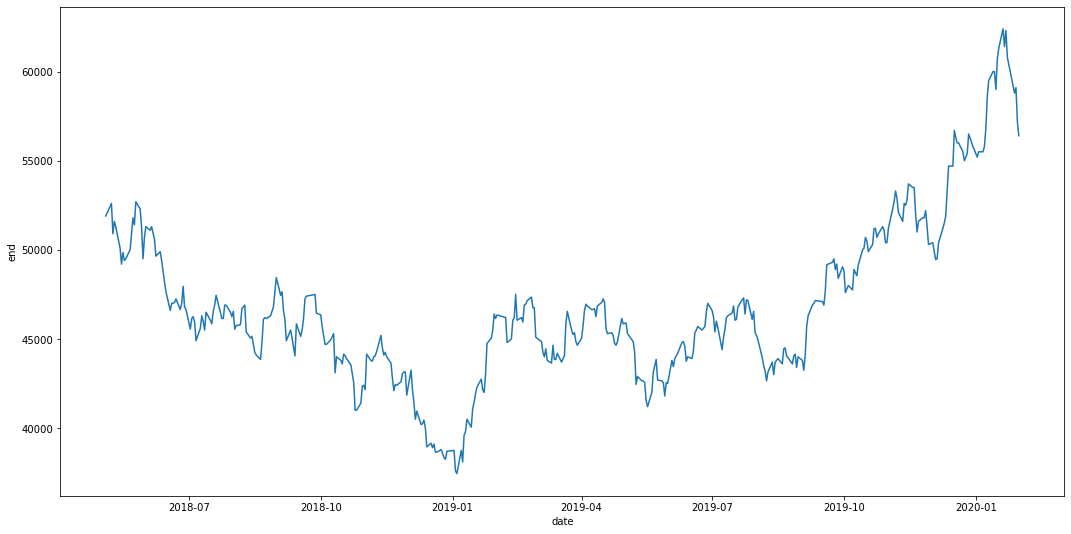

In [57]:
#종가
plt.figure(figsize=(18,9))
sns.lineplot(x=df.index, y=df['end'])

# 주가지수 예측모형

In [74]:
#5_days ahead prediction(5영업일 이후 종가를 종속변수로 설정)
df['y'] = df['end'].shift(7)

#7만큼 종가를 이전으로 가져왔기때문에 결측치 7개 존재
df = df.sort_index()
df.head(20)

,start,high,low,end,volume,y
date,,,,,,
2018-05-04,53000,53900,51800,51900,39565391,NaN
2018-05-08,52600,53200,51900,52600,23104720,NaN
2018-05-09,52600,52800,50900,50900,16128305,NaN
2018-05-10,51700,51700,50600,51600,13905263,NaN
2018-05-11,52000,52200,51200,51300,10314997,NaN
2018-05-14,51000,51100,49900,50100,14909272,NaN
2018-05-15,50200,50400,49100,49200,18709146,NaN
2018-05-16,49200,50200,49150,49850,15918683,51900.0
2018-05-17,50300,50500,49400,49400,10365440,52600.0


In [75]:
#결측치 제거
df = df.dropna()

In [76]:
#입력변수 설정(시가, 저가, 고가, 종가, 거래량)
X = df.drop(columns = 'y')
#종속변수 설정(5영업일 뒤 종가)
y = df['y']

In [61]:
#학습용, 검증용 데이터셋 나누기(7:3, shuffle = False로 지정해 random sampling되지 않게 설정)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    shuffle=False)

In [62]:
X_train

,start,high,low,end,volume
date,,,,,
2018-05-04,53000,53900,51800,51900,39565391
2018-05-08,52600,53200,51900,52600,23104720
2018-05-09,52600,52800,50900,50900,16128305
2018-05-10,51700,51700,50600,51600,13905263
2018-05-11,52000,52200,51200,51300,10314997
...,...,...,...,...,...
2019-07-10,45550,46150,45500,45550,9253930
2019-07-11,46350,46550,46150,46200,10989751
2019-07-12,46350,46400,45800,46300,5245804


In [63]:
X_test

,start,high,low,end,volume
date,,,,,
2019-07-17,46150,46350,45950,46050,5216602
2019-07-18,46450,46450,45650,46100,5143554
2019-07-19,46650,46950,46600,46800,8819393
2019-07-22,46800,47300,46600,47200,9009109
2019-07-23,47350,47550,47050,47300,9061381
...,...,...,...,...,...
2020-01-14,60400,61000,59900,60000,16906295
2020-01-15,59500,59600,58900,59000,14300928
2020-01-16,59100,60700,59000,60700,14381774


In [64]:
#확인
print("학습 데이터 개수:", X_train.shape[0])
print("평가 데이터 개수:", X_test.shape[0])

학습 데이터 개수: 293
평가 데이터 개수: 126


# MA(5) 모형

In [65]:
#MA(5)예측값 생성 - 평가데이터 개수만큼
#rolling함수 사용해 이전 5일치 평균 활용해 예측값 생성
pred_MA = df['y'].rolling(window = 5).mean()[293:]

#성과지표 확인
print('MAPE:', MAPE(pred_MA, y_test))
print('RMSE', RMSE(pred_MA, y_test))

MAPE: 1.424420889733661
RMSE 937.8039189916998


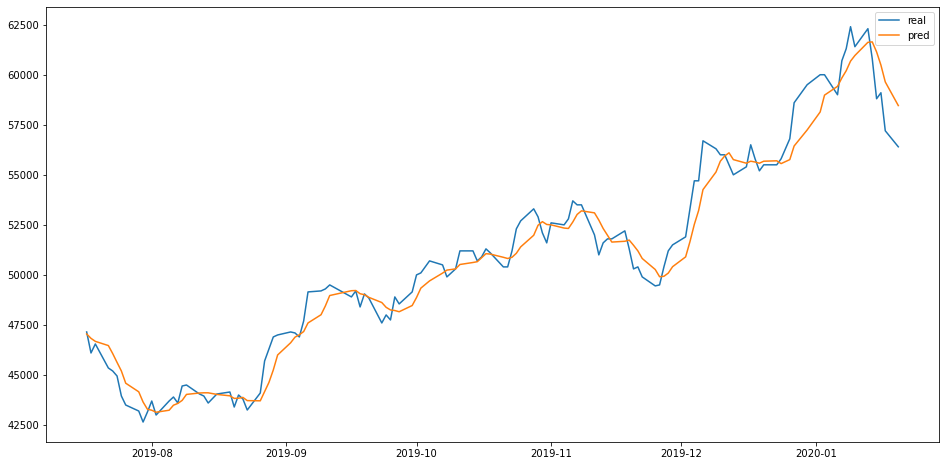

In [66]:
plt.figure(figsize = (16,8))
plt.plot(y_test, label = 'real')
plt.plot(pred_MA, label = 'pred')
plt.legend()

# 인공신경망 모형

In [67]:
#모형 생성
NN = MLPRegressor(hidden_layer_sizes = 10, #은닉층 노드 개수
                  momentum = 0.1, #모멘텀
                  learning_rate_init = 0.1, #학습률
                  max_iter = 1000, #epoch
                  random_state = 1) # 모형 고정
#모형 학습
NN.fit(X_train, y_train)

#예측 값 생성
pred_NN = NN.predict(X_test)

#성과지표 확인
print('MAPE:', MAPE(pred_NN, y_test))
print('RMSE', RMSE(pred_NN, y_test))

MAPE: 3.57633740833574
RMSE 2301.6912133486626


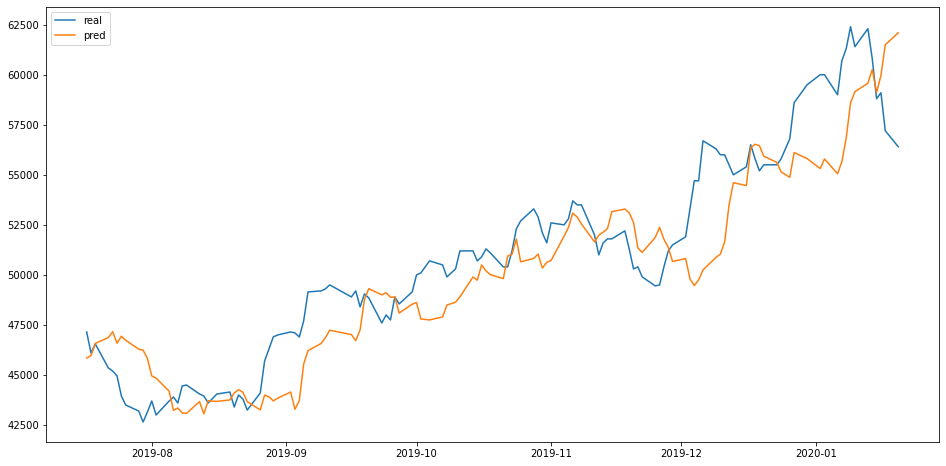

In [68]:
plt.figure(figsize = (16,8))
plt.plot(pd.DataFrame(y_test), label = 'real')
plt.plot(pd.DataFrame(pred_NN, index = y_test.index), label = 'pred')
plt.legend()

# 순환 신경망 모형

In [69]:
#모형 구축
model = Sequential()
model.add(SimpleRNN(12, input_shape=(5,1), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['acc'])

In [70]:
#keras 입력값 형식 변경
train_x = X_train.values.reshape(X_train.shape[0],5,1) #행 길이, 변수 개수, 차원(1)
test_x = X_test.values.reshape(X_test.shape[0],5,1) 

In [71]:
#학습하기
epochs = 40
batch_size = 2
model.fit(train_x, y_train,
          batch_size=batch_size,
          epochs=epochs,
          shuffle=False)

Epoch 1/40
147/147 [==============================] - 3s 3ms/step - loss: 23017212623.5676 - acc: 0.0000e+00
Epoch 2/40
147/147 [==============================] - 0s 3ms/step - loss: 757555488.8649 - acc: 0.0000e+00
Epoch 3/40
147/147 [==============================] - 0s 3ms/step - loss: 1162101599.7838 - acc: 0.0000e+00
Epoch 4/40
147/147 [==============================] - 0s 3ms/step - loss: 1901989197.4054 - acc: 0.0000e+00
Epoch 5/40
147/147 [==============================] - 0s 2ms/step - loss: 1959676911.1351 - acc: 0.0000e+00
Epoch 6/40
147/147 [==============================] - 0s 2ms/step - loss: 1815241183.1351 - acc: 0.0000e+00
Epoch 7/40
147/147 [==============================] - 1s 4ms/step - loss: 1649515131.6757 - acc: 0.0000e+00
Epoch 8/40
147/147 [==============================] - 1s 4ms/step - loss: 1400733425.7297 - acc: 0.0000e+00
Epoch 9/40
147/147 [==============================] - 1s 4ms/step - loss: 1081655362.3784 - acc: 0.0000e+00: 0s - loss: 1573353841.2308 

In [72]:
pred_RNN = model.predict(test_x)
#성과지표 확인
print('MAPE:', MAPE(pred_RNN, pd.DataFrame(y_test).values))
print('RMSE', RMSE(pred_RNN, pd.DataFrame(y_test).values))

MAPE: 3.4203450502133186
RMSE 2236.8984965657287


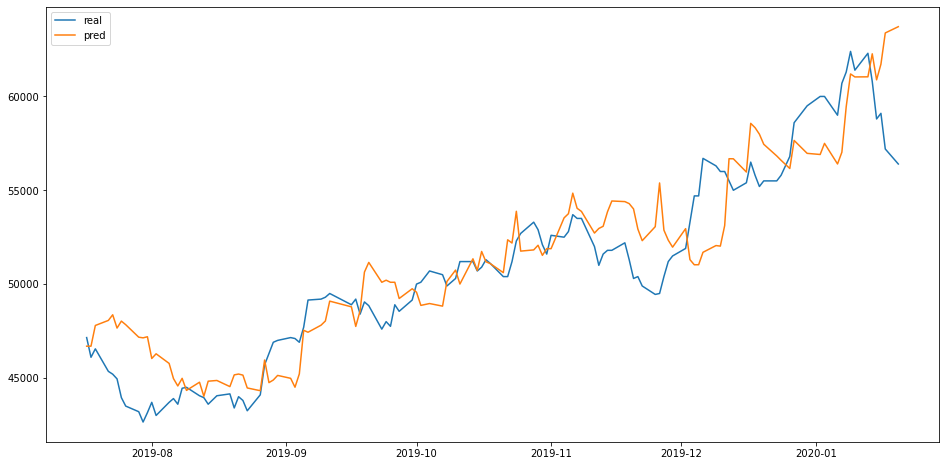

In [73]:
plt.figure(figsize = (16,8))
plt.plot(pd.DataFrame(y_test), label = 'real')
plt.plot(pd.DataFrame(pred_RNN, index = y_test.index), label = 'pred')
plt.legend()